# Loading the raw datasets

In [6]:
import kaggle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import horizontal, literal_evaluate

2024-12-02 13:06:01.904 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-12-02 13:06:01.906 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-12-02 13:06:01.907 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [7]:
# Loading Datasets from kaggle
kaggle.api.authenticate()  # To use the api, a kaggle.json file is necessary for authentication information. For more info: https://www.kaggle.com/docs/api
if not os.path.exists('raw_data'):
    kaggle.api.dataset_download_files(  # Downloads a dataset given the slug for owner/dataset_name, unzip=True unzips files on download, path is specified to data
        "alicemtopcu/top-1500-games-on-steam-by-revenue-09-09-2024", unzip=True, path="raw_data"
    )
    kaggle.api.dataset_download_files(
        "tristan581/all-55000-games-on-steam-november-2022", unzip=True, path="raw_data"
    )
    kaggle.api.dataset_download_files(
        "beridzeg45/video-games", unzip=True, path="raw_data"
    )
    kaggle.api.dataset_download_files(
        "najzeko/steam-reviews-2021", unzip=True, path="raw_data"
    )

top_1500_steam = pd.read_csv("raw_data/Steam_2024_bestRevenue_1500.csv")
all_55000_steam = pd.read_csv("raw_data/steam_games.csv", sep=';', low_memory=False)
metacritic = pd.read_csv("raw_data/all_video_games(cleaned).csv")

The steam review dataset contains around 8.17 gigabytes of data. Because of my limitations on computation power, and limitations of GitHub file sizes, we filter for around 100 megabytes (maximum allowed on Github) of data, in only the english language (around 300 thousand observations). We do this by loading the entire dataset into memory, then performing random sampling.

In [ ]:
filtered_rows = [] # Filtering for only english reviews

chunk_size = 100000  # A reasonable amount of memory per chunk based on my system specs
for chunk in pd.read_csv("raw_data/steam_reviews.csv", chunksize=chunk_size):
    filtered_chunk = chunk[chunk["language"] == "english"]
    filtered_rows.append(filtered_chunk)
filtered_data = pd.concat(filtered_rows, ignore_index=True)

# Randomly sample 300000 rows
sampled_data = filtered_data.sample(n=300000, random_state=1337)
steam_reviews = sampled_data

# Saving the raw to showcase cleaning in the about page

In [ ]:
# Saving formatted and standardized data to csv
top_1500_steam.to_csv("data/pre_top_1500_steam.csv", index=False)
all_55000_steam.to_csv("data/pre_all_55000_steam.csv", index=False)
metacritic.to_csv("data/pre_metacritic.csv", index=False)
steam_reviews.to_csv("data/pre_steam_reviews.csv", index=False)

# Initial Data Analysis

In [13]:
# Displaying data basics
def display_basics(df: pd.DataFrame):
    display(df.head())
    object_cols = df.select_dtypes(include=['object']).columns
    horizontal([df.describe(), df[object_cols].describe()])

display_basics(top_1500_steam)
display_basics(all_55000_steam)
display_basics(metacritic)
display_basics(steam_reviews)

display(top_1500_steam.info())
display(all_55000_steam.info())
display(metacritic.info())
display(steam_reviews.info())

,name,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publishers,developers,steam_id
0,WWE 2K24,2024-03-07,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,2024-06-14,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


,app_id,name,short_description,developers,publishers,genres,tags,type,categories,owners,...,price,initial_price,discount,ccu,languages,platforms,release_date,required_age,website,header_image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",...,9.99,9.99,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000-11-01,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,9.99,9.99,0,0,"English, Korean, Simplified Chinese",windows,2021-05-14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,5.99,19.99,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020-10-16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,19.99,19.99,0,76,English,"windows, mac",2020-10-14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,1.99,1.99,0,0,Simplified Chinese,windows,2019-03-30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


,name,release_date,developer,publisher,genres,product_rating,user_score,user_ratings_count,platforms_info
0,Ziggurat (2012),2012-02-17,Action Button Entertainment,Freshuu Inc.,Action,NaN,69,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,2001-11-15,Terminal Reality,Gathering,Auto Racing Sim,Rated E For Everyone,<NA>,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),2002-01-22,Namco,Namco,Auto Racing Sim,Rated E For Everyone,58,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,2006-11-14,Piranha Bytes,Aspyr,Western RPG,Rated T For Teen,75,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,2021-05-18,FishTankStudio,Black Eye Games,RPG,NaN,65,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,10765692,960090,Bloons TD 6,57959947,english,A fun way to pass the time,1574801255,1574801255,True,1,...,True,False,False,76561198124352628,340,2,799.0,0.0,42.0,1.603573e+09
1,10133908,252950,Rocket League,32698337,english,"Saturday, 24 June 2017\nStoney is now Online.\...",1498252291,1498252291,True,0,...,False,False,False,76561198104212571,156,1,88680.0,0.0,8208.0,1.604217e+09
2,8678825,48700,Mount & Blade: Warband,23647503,english,"This is a great game, if you like strategy and...",1466326443,1466326443,True,1,...,False,False,False,76561198202284244,125,10,11478.0,0.0,6624.0,1.580897e+09
3,2277863,289070,Sid Meier's Civilization VI,28213879,english,Loving it and should only get better from here.,1480996428,1480996428,True,1,...,False,True,False,76561198040846548,129,16,2109.0,0.0,1136.0,1.584213e+09
4,1086925,4000,Garry's Mod,62524469,english,It's ok i guess......,1580146045,1580146045,True,0,...,False,False,False,76561198131069405,88,4,195287.0,0.0,184362.0,1.600083e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1500 non-null   object 
 1   release_date     1500 non-null   object 
 2   copies_sold      1500 non-null   int64  
 3   price            1500 non-null   float64
 4   revenue          1500 non-null   float64
 5   avg_playtime     1500 non-null   float64
 6   review_score     1500 non-null   int64  
 7   publisher_class  1500 non-null   object 
 8   publishers       1499 non-null   object 
 9   developers       1498 non-null   object 
 10  steam_id         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55691 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   app_id             55691 non-null  int64  
 1   name               55691 non-null  object 
 2   short_description  55654 non-null  object 
 3   developers         55561 non-null  object 
 4   publishers         55518 non-null  object 
 5   genres             55530 non-null  object 
 6   tags               55556 non-null  object 
 7   type               55691 non-null  object 
 8   categories         54721 non-null  object 
 9   owners             55691 non-null  object 
 10  positive_reviews   55691 non-null  int64  
 11  negative_reviews   55691 non-null  int64  
 12  price              55691 non-null  float64
 13  initial_price      55691 non-null  float64
 14  discount           55691 non-null  int64  
 15  ccu                55691 non-null  int64  
 16  languages          556

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                14034 non-null  object 
 1   release_date        13991 non-null  object 
 2   developer           13917 non-null  object 
 3   publisher           13917 non-null  object 
 4   genres              14034 non-null  object 
 5   product_rating      11005 non-null  object 
 6   user_score          11714 non-null  Int64  
 7   user_ratings_count  11299 non-null  float64
 8   platforms_info      14055 non-null  object 
dtypes: Int64(1), float64(1), object(7)
memory usage: 1002.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      300000 non-null  int64  
 1   app_id                          300000 non-null  int64  
 2   app_name                        300000 non-null  object 
 3   review_id                       300000 non-null  int64  
 4   language                        300000 non-null  object 
 5   review                          299467 non-null  object 
 6   timestamp_created               300000 non-null  int64  
 7   timestamp_updated               300000 non-null  int64  
 8   recommended                     300000 non-null  bool   
 9   votes_helpful                   300000 non-null  int64  
 10  votes_funny                     300000 non-null  int64  
 11  weighted_vote_score             300000 non-null  float64
 12  comment_count   

None

# Standardizing Columns

We have a wide variety of data types, both categorical and numeric.

Irregularities:
- top_1500_steam - reviewScore is out of 100
- all_55000_steam - no reviewScore out of 100, instead we are given counts of Positive Reviews nad Negative reviews for each game
- metacritic - "User Score" is out of 10 and is a float64

- We have a release date for each, with different formatting
    - top_1500_steam - "d-m-y"
    - all_55000_steam - "y/m/d"
    - metacritic - "m/d/y"

- We only have revenue data for the top_1500_steam games dataset
    - This revenue also does not directly match 'copiesSold' * 'price'. This revenue is an outside estimate, likely factoring in other metrics.
    - This revenue is likely much more accurate than using the "review count * metric * price" formula.

- all_55000_steam price and initial_price are both undecimaled

Tasklist:
1. Standardize column names
    * top_1500_steam has publishers and developers (plural), comma separated
    * all_55000_steam has publisher and developer, however they actually are also plural, comma separated. Renamed to publishers and developers
    * metacritic has publisher and developer, both of which are always singular.
    * steam_reviews has very few inconsistencies, replacing some periods with underscore is sufficient.
2. Standardize release date
3. Standardize review_score for top_1500_steam and all_55000_steam (ensure there is understanding behind why we can do this)
4. Standardize price and initial price formats to floats
5. Standardize the format for platforms_info in the metacritic data.

In [ ]:
# Standardizing column names to use lowercase and underscore separated format
top_1500_mapping = {
    'name': 'name',
    'releaseDate': 'release_date',
    'copiesSold': 'copies_sold',
    'price': 'price',
    'revenue': 'revenue',
    'avgPlaytime': 'avg_playtime',
    'reviewScore': 'review_score',
    'publisherClass': 'publisher_class',
    'publishers': 'publishers',
    'developers': 'developers',
    'steamId': 'steam_id'
}
top_1500_steam = top_1500_steam.rename(columns=top_1500_mapping)

all_55000_mapping = {
    'App ID': 'app_id',
    'Name': 'name',
    'Short Description': 'short_description',
    'Developer': 'developers',
    'Publisher': 'publishers',
    'Genre': 'genres',
    'Tags': 'tags',
    'Type': 'type',
    'Categories': 'categories',
    'Owners': 'owners',
    'Positive Reviews': 'positive_reviews',
    'Negative Reviews': 'negative_reviews',
    'Price': 'price',
    'Initial Price': 'initial_price',
    'Discount': 'discount',
    'CCU': 'ccu',
    'Languages': 'languages',
    'Platforms': 'platforms',
    'Release Date': 'release_date',
    'Required Age': 'required_age',
    'Website': 'website',
    'Header Image': 'header_image'
}
all_55000_steam = all_55000_steam.rename(columns=all_55000_mapping)

metacritic_mapping = {
    'Title': 'name',
    'Release Date': 'release_date',
    'Developer': 'developer',
    'Publisher': 'publisher',
    'Genres': 'genres',
    'Product Rating': 'product_rating',
    'User Score': 'user_score',
    'User Ratings Count': 'user_ratings_count',
    'Platforms Info': 'platforms_info'
}
metacritic = metacritic.rename(columns=metacritic_mapping)

steam_reviews_mapping = {
    'app_id': 'app_id',
    'app_name': 'name',
    'review_id': 'review_id',
    'language': 'language',
    'review': 'review',
    'timestamp_created': 'timestamp_created',
    'timestamp_updated': 'timestamp_updated',
    'recommended': 'recommended',
    'votes_helpful': 'votes_helpful',
    'votes_funny': 'votes_funny',
    'weighted_vote_score': 'weighted_vote_score',
    'comment_count': 'comment_count',
    'steam_purchase': 'steam_purchase',
    'received_for_free': 'received_for_free',
    'written_during_early_access': 'written_during_early_access',
    'author.steamid': 'author_steamid',
    'author.num_games_owned': 'author_num_games_owned',
    'author.num_reviews': 'author_num_reviews',
    'author.playtime_forever': 'author_playtime_forever',
    'author.playtime_last_two_weeks': 'author_playtime_last_two_weeks',
    'author.playtime_at_review': 'author_playtime_at_review',
    'author.last_played': 'author_last_played'
}
steam_reviews = steam_reviews.rename(columns=steam_reviews_mapping)

# Standardizing the date format for 'release_date'
top_1500_steam['release_date'] = pd.to_datetime(top_1500_steam['release_date'], format='%d-%m-%Y', errors='coerce')
top_1500_steam['release_date'] = top_1500_steam['release_date'].dt.strftime('%Y-%m-%d')  # Standard format: YYYY-MM-DD

# Annoyingly, all_55000_steam has many different date formats besides just YYYY-MM-DD, also includes "MON YYYY" and "MON DD, YYYY" format
# Define patterns for each of the three formats
pattern_ymd = r'^\d{4}/\d{2}/\d{2}$'  # Matches "YYYY/MM/DD" format
pattern_mon_year = r'^[A-Za-z]{3} \d{4}$'  # Matches "Mon YYYY" format
pattern_mon_day_year_comma = r'^[A-Za-z]{3} \d{1,2}, \d{4}$'  # Matches "Mon DD, YYYY" format

mask_year_month_day = all_55000_steam['release_date'].str.match(pattern_ymd, na=False)
mask_mon_year = all_55000_steam['release_date'].str.match(pattern_mon_year, na=False)
mask_mon_day_year = all_55000_steam['release_date'].str.match(pattern_mon_day_year_comma, na=False)

all_55000_steam.loc[mask_year_month_day, 'release_date'] = pd.to_datetime(all_55000_steam.loc[mask_year_month_day, 'release_date'], format='%Y/%m/%d')
all_55000_steam.loc[mask_mon_year, 'release_date'] = pd.to_datetime(all_55000_steam.loc[mask_mon_year, 'release_date'], format='%b %Y') + pd.offsets.MonthBegin(1)
all_55000_steam.loc[mask_mon_day_year, 'release_date'] = pd.to_datetime(all_55000_steam.loc[mask_mon_day_year, 'release_date'], format='%b %d, %Y')

all_55000_steam['release_date'] = pd.to_datetime(all_55000_steam['release_date'], format='ISO8601')
all_55000_steam['release_date'] = all_55000_steam['release_date'].dt.strftime('%Y-%m-%d')  # Standard format: YYYY-MM-DD

metacritic['release_date'] = pd.to_datetime(metacritic['release_date'], format='%m/%d/%Y', errors='coerce')
metacritic['release_date'] = metacritic['release_date'].dt.strftime('%Y-%m-%d')

# Standardizing review_score and user_score to utilize the same scale (user_score is a float with a single decimal of precision)
metacritic['user_score'] = (metacritic['user_score'] * 10).astype('Int64')

# Standardizing price and initial_price from all_55000_steam
all_55000_steam['price'] = all_55000_steam['price'] / 100
all_55000_steam['initial_price'] = all_55000_steam['initial_price'] / 100
    
# Standardizing the metacritic platforms info data?
metacritic['platforms_info'] = metacritic['platforms_info'].apply(literal_evaluate)

# Dropping the unnamed column 0
steam_reviews = steam_reviews.drop(["Unnamed: 0"], axis=1)

# Analyzing Missing Data

In [16]:
top_1500_steam_nulls = pd.DataFrame({'Null Counts': top_1500_steam.isnull().sum()})
all_55000_steam_nulls = pd.DataFrame({'Null Counts': all_55000_steam.isnull().sum()})
metacritic_nulls = pd.DataFrame({'Null Counts': metacritic.isnull().sum()})
steam_reviews_nulls = pd.DataFrame({'Null Counts': steam_reviews.isnull().sum()})

horizontal(
    [
        top_1500_steam_nulls.style.set_caption("top_1500_steam"),
        all_55000_steam_nulls.style.set_caption("all_55000_steam"),
        metacritic_nulls.style.set_caption("metacritic"),
        steam_reviews_nulls.style.set_caption("steam_reviews")
    ]
)

,Null Counts
name,0
release_date,0
copies_sold,0
price,0
revenue,0
avg_playtime,0
review_score,0
publisher_class,0
publishers,1
developers,2


Our datasets exhibit lots of missing values for various different features:
- Within top_1500_steam we have very few missing values, only 1 or 2 for publishers and developers.
- Within all_55000_steam we have missing values for many different features: short_description, developer, publisher, genre, tags, categories, languages, release_date, and website
- Within metacritic we have a large proportion of missing values, as well as missing values for almost every feature across the board.
- Within steam_reviews we have a very small amount of missing data in the "review" and "author_playtime_at_review" features. Only a couple hundred values out of hundreds of thousands.

To determine how best to handle our missing data, we must perform some analysis

Starting with the top_1500_steam dataset, since we have only a few missing values, we may simply examine the rows:

In [5]:
top_1500_steam[top_1500_steam.isnull().any(axis=1)]

,name,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publishers,developers,steam_id
643,YUME 4,2024-01-12,18572,4.99,54457.0,1.225076,78,Indie,Lovely Games,NaN,2602730
710,Pixel Noir,2024-02-08,3129,24.99,47871.0,8.461324,67,Hobbyist,NaN,SWDTech Games,754320
765,Hypnosis Card,2024-01-19,10812,4.99,41891.0,2.016618,77,Indie,Lovely Games,NaN,2544990


We can note that all our observations with missing values are "indie" or "hobbyist" type games. These games are likely self-published, and so our publisher and developer are likely to be the same. To remedy this, since there are so few rows, we will simply manually fill in the missing values using their steam page information.

In [6]:
top_1500_steam.loc[[643, 765], 'developers'] = ['Lovely Games', 'Naku Kinoko']
top_1500_steam.loc[710, 'publishers'] = 'SWDTech Games'
top_1500_steam.loc[[643, 710, 765]]

,name,release_date,copies_sold,price,revenue,avg_playtime,review_score,publisher_class,publishers,developers,steam_id
643,YUME 4,2024-01-12,18572,4.99,54457.0,1.225076,78,Indie,Lovely Games,Lovely Games,2602730
710,Pixel Noir,2024-02-08,3129,24.99,47871.0,8.461324,67,Hobbyist,SWDTech Games,SWDTech Games,754320
765,Hypnosis Card,2024-01-19,10812,4.99,41891.0,2.016618,77,Indie,Lovely Games,Naku Kinoko,2544990


For the all_55000_steam dataset, we have a varying amount of missing data between our features, some have large proportions while others have very few. From our previous basic null count, we can see our 'website' feature has a disproportionately high missing value count. Since our analysis will not be particular on the site value itself, to complete our missingness analysis, we will temporarily drop this column.

We also do not care too much about the categories column, we mainly want to try and save our developers, publishers and release_dates if possible.

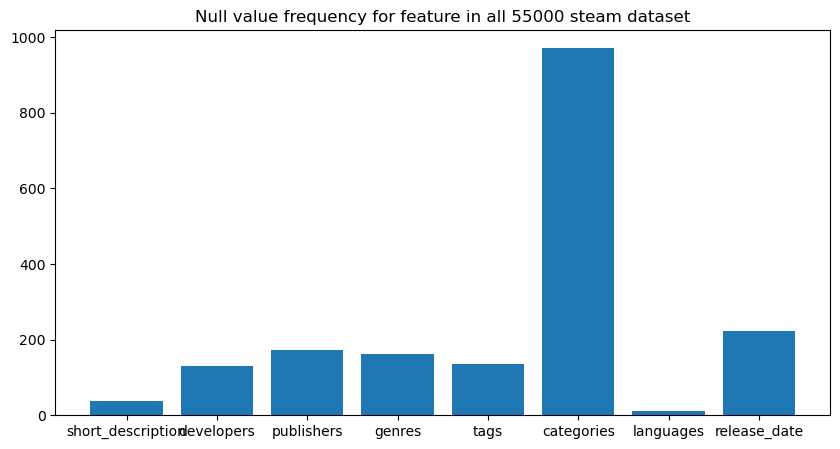

In [7]:
all_55000_steam_nulls_no_website = all_55000_steam_nulls.drop(['website'], axis=0)
plt.figure(figsize=(10,5))
plt.bar(
    x = all_55000_steam_nulls_no_website[all_55000_steam_nulls_no_website['Null Counts'] != 0].index,
    height = all_55000_steam_nulls_no_website[all_55000_steam_nulls_no_website['Null Counts'] != 0]['Null Counts'],
)
plt.title("Null value frequency for feature in all 55000 steam dataset")
plt.show()

Within our features with missing values, our frequency proportions are relatively low; we have a couple hundred or so missing values, with categories being an outlier at around a thousand. To understand whether these missing values are by accident or if they are truly missing from the game's details, we will perform some manual analysis for these select observations.

In [8]:
print(f'Number of observations with missing data (not website): {all_55000_steam.drop(labels=['website'], axis=1)[all_55000_steam.drop(labels=['website'], axis=1).isnull().any(axis=1)].__len__()}')
all_55000_steam.drop(labels=['website'], axis=1)[all_55000_steam.drop(labels=['website'], axis=1).isnull().any(axis=1)].tail()

Number of observations with missing data (not website): 1644


,app_id,name,short_description,developers,publishers,genres,tags,type,categories,owners,...,negative_reviews,price,initial_price,discount,ccu,languages,platforms,release_date,required_age,header_image
55586,996150,SUBURI,NOTE : This App is a batting simulator NOT a u...,SHI LIN,SHI LIN,"Education, Game Development","Education: 22, Game Development: 21",game,NaN,"0 .. 20,000",...,0,5.99,5.99,0,0,English,windows,2019-01-07,0,https://cdn.akamai.steamstatic.com/steam/apps/...
55659,998950,Rhythm Nights,An Engaging Beat Smasher experience designed f...,Anti Gravity Systems,NaN,"Action, Casual, Indie","Action: 41, Casual: 41, Indie: 41, Rhythm: 12,...",game,Single-player,"0 .. 20,000",...,2,4.99,4.99,0,0,English,windows,2019-12-12,0,https://cdn.akamai.steamstatic.com/steam/apps/...
55684,999840,RONE,RONE is a 360' film and interactive art galler...,"StudioBento, Paperticket Studios",StudioBento,"Design & Illustration, Video Production","Design & Illustration: 21, Video Production: 2...",game,NaN,"0 .. 20,000",...,0,4.99,4.99,0,0,English,windows,2018-12-18,0,https://cdn.akamai.steamstatic.com/steam/apps/...
55686,999880,NASA's Exoplanet Excursions,Take VR journeys through the amazing TRAPPIST-...,"Caltech/IPAC, NASA's Jet Propulsion Laboratory","Caltech/IPAC, NASA's Jet Propulsion Laboratory",Education,"Education: 22, VR: 6, Space: 5",game,NaN,"0 .. 20,000",...,3,0.00,0.00,0,0,English,windows,2019-04-18,0,https://cdn.akamai.steamstatic.com/steam/apps/...
55688,999900,Studio by RADiCAL,"RADiCAL Studio is a real-time, unlimited motio...",RADiCAL,"RADiCAL Solutions, LLC",Animation & Modeling,"Animation & Modeling: 25, 3D: 13",game,NaN,"20,000 .. 50,000",...,19,0.00,0.00,0,0,English,windows,2019-01-04,0,https://cdn.akamai.steamstatic.com/steam/apps/...


The "SUBURI" observation is missing its categories feature, however from a quick glance at their Steam page, they seem to have categories for their game listed. Doing some further analysis reveals the same for many other observations within our dataset, features missing which are present.
- This may be due to the age of the dataset, games may have updated their page since their release.

Because the amount of missing data is relatively low, and our missing features can be found on the game's steam page, we may utilize the Steam API to restore as many features as possible.
- Some features may still remain NaN, the data may truly be missing from the Steam game details.

In [ ]:
from utils import get_steam_app_details_from_app_id
from datetime import datetime

def clean_and_save():
    cleaned_app_details_dict = {}
    for app_id, app_details in app_details_dict.items():
        if app_details is not None:
            cleaned_app_details_dict[app_id] = app_details
    app_details_df = pd.DataFrame(index=cleaned_app_details_dict.keys(), data=cleaned_app_details_dict.values())
    app_details_df.to_csv('raw_data/loaded_steam_app_details.csv')
    return app_details_df


# Get information for all of our observations which have missing data (that is not website)
app_ids = all_55000_steam.drop(labels=['website'], axis=1)[all_55000_steam.drop(labels=['website'], axis=1).isnull().any(axis=1)]['app_id'].values

app_details_dict = {}
loaded_app_details = 0
for app_id in app_ids:
    app_details_dict[app_id] = get_steam_app_details_from_app_id(str(app_id))
    loaded_app_details += 1
    if loaded_app_details % 100 == 0: # Every 100, save a log
        with open('steam_api_logging.txt', 'a', encoding='utf-8') as f:
            f.write(f"Successfully loaded {loaded_app_details} app details | time: {datetime.now()}\n")
            f.close()
    if loaded_app_details % 200 == 0: # Every 200, save a snapshot
        clean_and_save()
clean_and_save()

In [ ]:
successful_retrieval_count = 0
failed_retrieval_count = 0
failed_to_retrieve_app_ids = []

for app_id, app_details in app_details_dict.items():
    if app_details is None or type(app_details) is not dict:
        failed_retrieval_count += 1
        print(f'Failed to retrieve {app_id} details, got: {type(app_details)}')
        failed_to_retrieve_app_ids.append(app_id)
    else:
        successful_retrieval_count += 1

print(f'Successful Retrievals: {successful_retrieval_count}\nFailed Retrievals: {failed_retrieval_count}')
print(f'Failure app_ids: {failed_to_retrieve_app_ids}')

Since the amount was minimal, we opt for a manual review for each app_id utilizing steamdb.info

- App ID 499450: "The Witcher 3: Wild Hunt - Game of the Year Edition"
    - This app was retired from the steam store some time ago.
- App ID 813350: "Ben 10 VR"
    - This app is not available within our region of polling.
- App ID 895970: "BlackShot Revolution"
    - This app is not available within our region of polling.
- App ID 974470: "Girls Free"
    - This app was retired from the steam store some time ago.



In [9]:
# Fill in as much missing data as possible with gathered information
def fill_in_missing_data():
    app_details_df = pd.read_csv('raw_data/loaded_steam_app_details.csv')
    app_details_df.rename( columns={'Unnamed: 0': 'app_id'}, inplace=True)
    app_details_df.set_index('app_id', inplace=True)
    app_details_df.index.name = None

    app_details_df['developers'] = app_details_df['developers'].apply(literal_evaluate)
    app_details_df['publishers'] = app_details_df['publishers'].apply(literal_evaluate)
    app_details_df['genres'] = app_details_df['genres'].apply(literal_evaluate)
    app_details_df['categories'] = app_details_df['categories'].apply(literal_evaluate)
    app_details_df['release_date'] = app_details_df['release_date'].apply(literal_evaluate)
    for app_id, app_details in app_details_df.iterrows():
        observation = all_55000_steam.loc[all_55000_steam['app_id'] == app_id]
        if observation['short_description'].hasnans:
            all_55000_steam.loc[all_55000_steam['app_id'] == app_id, 'short_description'] = app_details['short_description']
        if observation['developers'].hasnans:
            if type(app_details['developers']) is list:
                all_55000_steam.loc[all_55000_steam['app_id'] == app_id, 'developers'] =  ', '.join(app_details['developers'])
        if observation['publishers'].hasnans:
            if type(app_details['publishers']) is list:
                all_55000_steam.loc[all_55000_steam['app_id'] == app_id, 'publishers'] = ', '.join(app_details['publishers'])
        if observation['genres'].hasnans:
            if type(app_details['genres']) is list:
                all_55000_steam.loc[all_55000_steam['app_id'] == app_id, 'genres'] = ', '.join([genre['description'] for genre in app_details['genres']])
        if observation['categories'].hasnans:
            if type(app_details['categories']) is list:
                all_55000_steam.loc[all_55000_steam['app_id'] == app_id, 'categories'] = ', '.join([category['description'] for category in app_details['categories']])
        if observation['release_date'].hasnans:
            if app_details['release_date']['date'] and app_details['release_date']['date']:
                all_55000_steam.loc[all_55000_steam['app_id'] == app_id, 'release_date'] = app_details['release_date']['date']

fill_in_missing_data()

In [10]:
all_55000_steam.isnull().sum()

app_id                   0
name                     0
short_description       36
developers             123
publishers             119
genres                  90
tags                   135
type                     0
categories             655
owners                   0
positive_reviews         0
negative_reviews         0
price                    0
initial_price            0
discount                 0
ccu                      0
languages               11
platforms                0
release_date            95
required_age             0
website              25217
header_image             0
dtype: int64

We can a minor improvement in NaN count, however we are still missing many rows. Evidently the steam API can give us missing values, which may explain the dataset's missingness origins.
- Checking several observations manually, the values are truly missing from our Steam API call, despite other information being returned.

We cannot fix by true imputation any further than this, but from our observations we may yet improve our result. Looking at our data, evidently we can see publishers and developers are often one and the same. In this light, we can reasonably impute publisher by developer (if present) and developer by publisher (if present).

In [11]:
# Checking our proportion which has publishers developers as the same entry
publishers_developers_same = all_55000_steam['publishers'] == all_55000_steam['developers']
percentage_publishers_developers_same = publishers_developers_same.sum() / all_55000_steam.__len__()
print(f"Percentage of games with the same publisher and developer: {percentage_publishers_developers_same * 100:.2f}%")

# Checking where our publisher is missing but the developer is present
missing_publishers_present_developers = all_55000_steam[all_55000_steam['publishers'].isna() & all_55000_steam['developers'].notna()]
print(f"Number of observations with missing publishers present developers: {missing_publishers_present_developers.__len__()}")

# Checking where our developer is missing but the publisher is present
missing_developers_present_publishers = all_55000_steam[all_55000_steam['developers'].isna() & all_55000_steam['publishers'].notna()]
print(f"Number of observations with missing developers present publishers: {missing_developers_present_publishers.__len__()}")

# Checking where both our publisher and developer are missing
missing_developers_missing_publishers = all_55000_steam[all_55000_steam['developers'].isna() & all_55000_steam['publishers'].isna()]
print(f"Number of observations with missing developers and publishers: {missing_developers_missing_publishers.__len__()}")

Percentage of games with the same publisher and developer: 67.23%
Number of observations with missing publishers present developers: 104
Number of observations with missing developers present publishers: 108
Number of observations with missing developers and publishers: 15


From some basic analytics, we can see we can impute $104 + 108 = 212$ observations using this method, $15$ will not be imputable.
- It should be noted that categorical imputation cannot be done using many of the methods we were shown
    - Regression only works for numerical solution
    - KNN imputation does not make much sense in this context, though we may have nearest neighbors, our feature is somewhat unique to each entry no matter other numerical simmilarities.
        - SMOTE in a similar light.


In [12]:
for i, row in missing_publishers_present_developers.iterrows():
    all_55000_steam.at[i, 'publishers'] = row['developers']
for i, row in missing_developers_present_publishers.iterrows():
    all_55000_steam.at[i, 'developers'] = row['publishers']

In [13]:
all_55000_steam.isna().sum()

app_id                   0
name                     0
short_description       36
developers              15
publishers              15
genres                  90
tags                   135
type                     0
categories             655
owners                   0
positive_reviews         0
negative_reviews         0
price                    0
initial_price            0
discount                 0
ccu                      0
languages               11
platforms                0
release_date            95
required_age             0
website              25217
header_image             0
dtype: int64

Moving onto the metacritic dataset

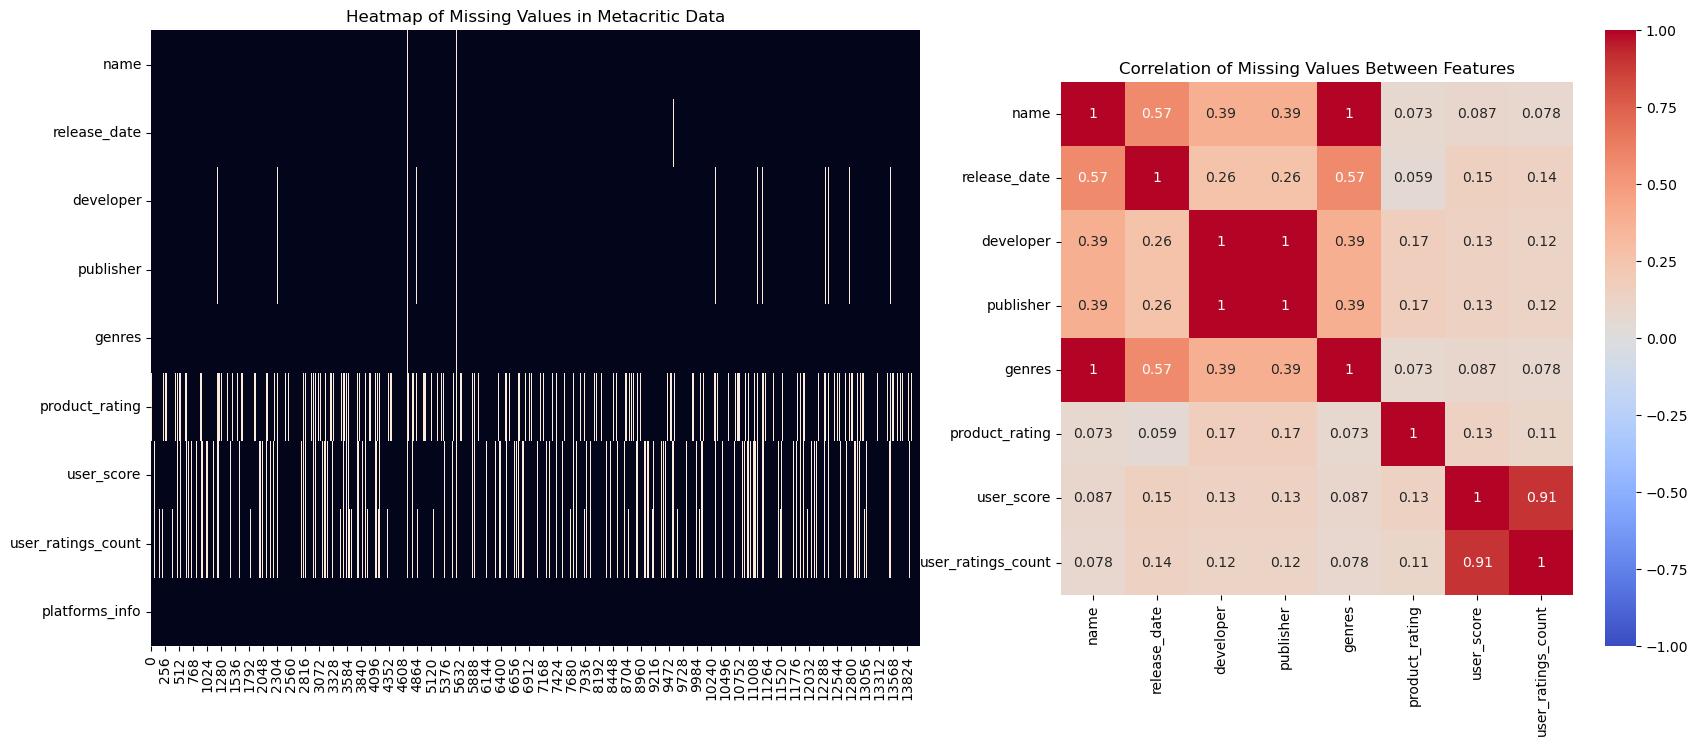

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [1.2, 1]})

# Visualizing missing values in a heatmap
sns.heatmap(metacritic.isnull().T, ax=axes[0], cbar=False)
axes[0].set_title('Heatmap of Missing Values in Metacritic Data')

missing_corr = metacritic.drop(['platforms_info'], axis=1).isnull().corr() # Dropping platforms_info, since we have no missing values for platforms_info
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1, square=True, ax=axes[1])
axes[1].set_title('Correlation of Missing Values Between Features')

plt.show()

Here we are drawing two heatmaps, one analyzing the feature missingness distribution against the observation indices, one analyzing feature missingness correlations, whether one feature being missing correlates to another also being missing.

From our missingness distribution heatmap, we can notice that certain features seem to be missing in groups.

-	Most notably, publisher and developer.
-	Some observations also seem to be missing entirely.

From our focused features missing values correlations, we can notice:

-	genres missingness is 1:1 with name, meaning when name is missing genre is always missing.
-	product_rating missingness has low correlation with the missingness of our other values
-	user_score missingness is highly correlated (r = 0.91) with the missingness of user_ratings_count
    -	Intuitively, we can note that if we do not have any ratings, it would make sense that we would be lacking a score.


In [15]:
metacritic.loc[metacritic['name'].isnull()]

,name,release_date,developer,publisher,genres,product_rating,user_score,user_ratings_count,platforms_info
4681,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,[]
5391,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,[]
5394,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,[]
5419,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,[]
5424,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,[]
5446,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,[]
5455,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,[]
5492,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,[]
5548,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,[]
5571,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,[]


Looking closer at the few missing name values, we can notice that those entries that are missing name are also missing all their other feature columns. Since these observations do not contain any data, we can comfortably drop them. For further investigation, we may want to look into why these purely empty observations are within this dataset.

In [18]:
metacritic = metacritic.dropna(subset=['name']) # Dropping observations only where name is missing
metacritic.isnull().sum()

name                     0
release_date            43
developer              117
publisher              117
genres                   0
product_rating        3029
user_score            2320
user_ratings_count    2735
platforms_info           0
dtype: int64

In [17]:
publishers_developers_same = metacritic['publisher'] == metacritic['developer']
percentage_publishers_developers_same = publishers_developers_same.sum() / metacritic.__len__()
print(f"Percentage of games with the same publisher and developer: {percentage_publishers_developers_same * 100:.2f}%")

# Checking where our publisher is missing but the developer is present
missing_publishers_present_developers = metacritic[metacritic['publisher'].isna() & metacritic['developer'].notna()]
print(f"Number of observations with missing publishers present developers: {missing_publishers_present_developers.__len__()}")

# Checking where our developer is missing but the publisher is present
missing_developers_present_publishers = metacritic[metacritic['developer'].isna() & metacritic['publisher'].notna()]
print(f"Number of observations with missing developers present publishers: {missing_developers_present_publishers.__len__()}")

# Checking where both our publisher and developer are missing
missing_developers_missing_publishers = metacritic[metacritic['developer'].isna() & metacritic['publisher'].isna()]
print(f"Number of observations with missing developers and publishers: {missing_developers_missing_publishers.__len__()}")

Percentage of games with the same publisher and developer: 32.04%
Number of observations with missing publishers present developers: 0
Number of observations with missing developers present publishers: 0
Number of observations with missing developers and publishers: 117


Games without a product rating are actually simply "Unrated", no committee has been used to diagnose the appropriate age range for this game. For this reason, we will impute a new value, "Unrated" for all missing values to better represent what the NaN originally was meant for.

Though we can see that there are no "nulls" for platforms_info, upon further examination we can notice that several of our observations have empty lists for platforms_info. A total of 29 games within this last have empty lists, meaning no critic has reviewed the game for any platform.

For the three game score rating related metrics, user_score, user_ratings_count and platforms_info, it would be inappropriate to impute without further examination.

For our steam reviews dataset, we have a very low proportion of missing data in two categorical features "review" and "author_playtime_at_review". Given the datatype of review being text data, it would be inappropriate to impute using numerical methods (stochastic regression / SMOTE), and common categorical imputation methods like "by mode" or a modified kmeans make little sense. The text of each review is likely to be very unique in content, dependent on the game reviewed and the author writing it.

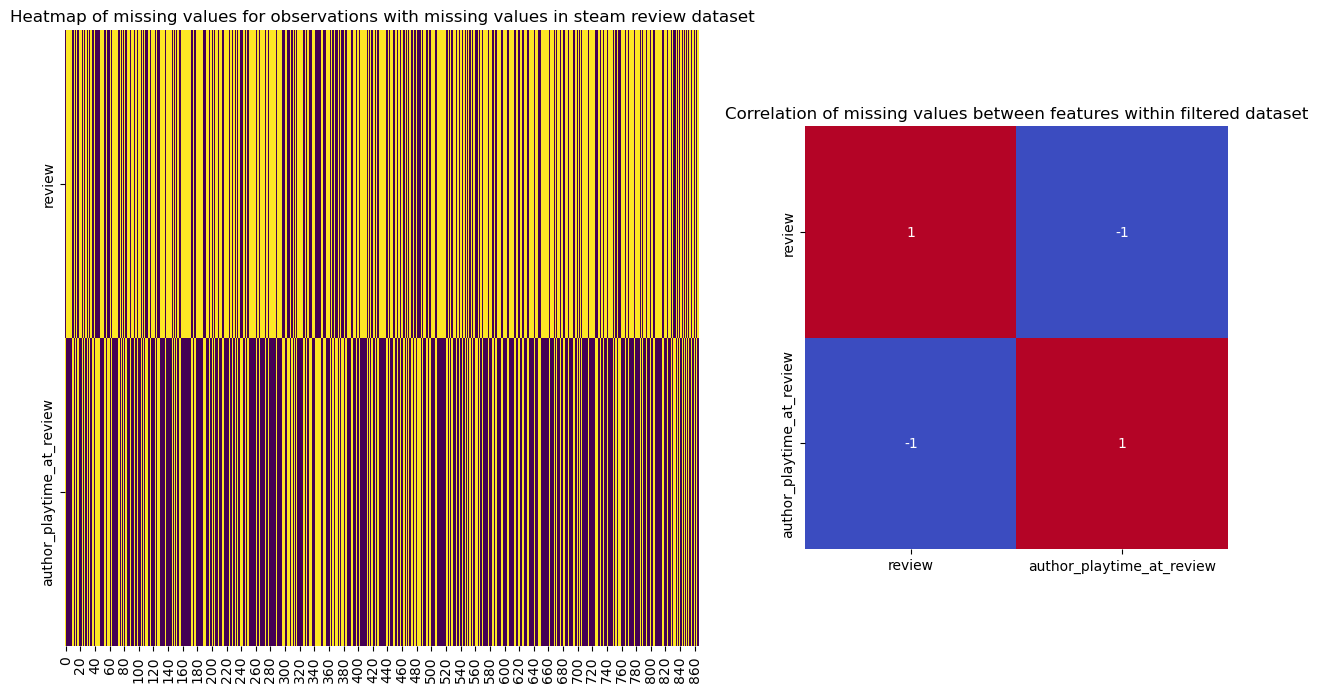

In [17]:
def plot_heatmaps_for_missingness_analysis_of_steam_reviews() -> plt.Figure:
    fig, axes = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw={'width_ratios': [1.5, 1]})

    missing_data_indices = steam_reviews[['review', 'author_playtime_at_review']].isnull().any(axis=1)
    filtered_df = steam_reviews.loc[missing_data_indices, ['review', 'author_playtime_at_review']]
    filtered_df.reset_index(inplace=True, drop=True)

    sns.heatmap(filtered_df.isnull().T, cbar=False, cmap='viridis', ax=axes[0])
    axes[0].set_title('Heatmap of missing values for observations with missing values in steam review dataset')

    missing_corr = filtered_df.isnull().corr()
    sns.heatmap(missing_corr, annot=True, cmap='coolwarm', cbar=False, vmin=-1, vmax=1, square=True, ax=axes[1])
    axes[1].set_title('Correlation of missing values between features within filtered dataset')
    return fig
_ = plot_heatmaps_for_missingness_analysis_of_steam_reviews()

Here we are drawing two heatmaps, one analyzing the feature missingness distribution against the observation indices, one analyzing feature missingness correlations, whether one feature being missing correlates to another also being missing.

Filtering and plotting by null values of "review" and "author_playtime_at_review" reveals suprisingly that these two have missingness that seems to be negatively related. Specifically, wherever "review" is missing, "author_playtime_at_review" is not missing", and vice versa. This suggests a systematic relationship in the way these data points are missing.

We can only postulate on why this relationship exists:
- Perhaps the data collection process had some anomalies, for some observations it simply only recorded one of the two.
- Perhaps some of the data was anomalous. Many things could go wrong with the data, for example a user who left a review perhaps later refunded their copy of the game. This might cause playtime to be missing. 
- Users also might be leaving blank reviews, only recording whether they recommend the game or not.

For our analysis, we will assume that missing reviews are legitimate reviews, but with no text data. In this situation, a user leaves a review only leaving their recommendation and playtime.
- We will not make the same assumption for the author playtime missingness. Instead, we will utilize stochastic regression with our most reasonable correlators as features.
    - This is definitely overkill for our use case, however we would like to showcase some technical knowledge of advanced numerical imputation methods.

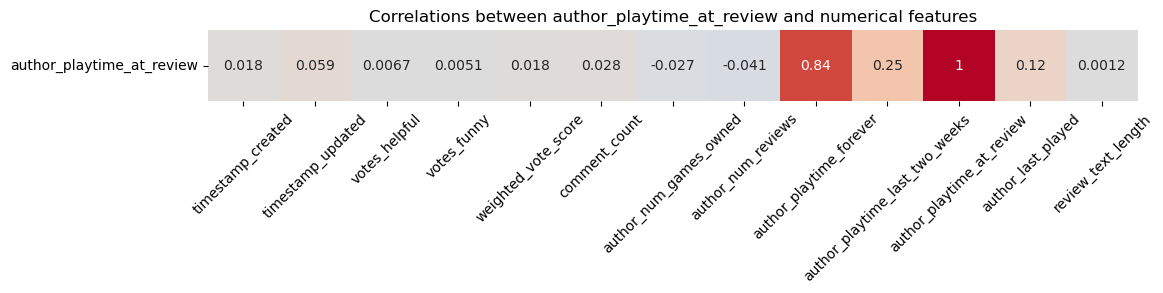

In [ ]:
steam_reviews['review'] = steam_reviews['review'].fillna("") # We treat our missing reviews as simply blank

def plot_correlations_between_author_playtime_and_numerical_features() -> plt.Figure:
    steam_reviews['review_text_length'] = steam_reviews['review'].apply(lambda x: len(x)) # Feature engineering review text length to see if we can observe any connection between length and our target
    plt.figure(figsize=(12,8))
    correlators = steam_reviews.select_dtypes("number").drop(["app_id", "review_id", "author_steamid"], axis=1)
    sns.heatmap(
        correlators.corr()[['author_playtime_at_review']].T,
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        square=True,
        cbar=False
    )
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.title("Correlations between author_playtime_at_review and numerical features")
    return plt.gcf()
_ = plot_correlations_between_author_playtime_and_numerical_features()

From a truncated correlation heatmap, we can observe very few great correlators. For our regression model, we will utilize only the top 2 correlators: "author_playtime_forever" and "author_playtime_last_two_weeks".
- Further testing reveals that adding more correlators only serves to reduce our accuracy in terms of mean squared error and mean absolute error.

In [19]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

steam_reviews_not_missing = steam_reviews[steam_reviews['author_playtime_at_review'].notnull()]
steam_reviews_with_missing = steam_reviews[steam_reviews['author_playtime_at_review'].isnull()]
predictors = ['author_playtime_forever', 'author_playtime_last_two_weeks']
target = 'author_playtime_at_review'

def create_and_validate_linear_regression_model(data: pd.DataFrame, predictors: list[str], target: str, handle_outliers: bool) -> list[LinearRegression, list[float]]:
    X = data[predictors] # Design
    y = data[target] # Target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1
    )

    # Perform outlier handling
    if handle_outliers:
        train_data = pd.concat([X_train, y_train], axis=1)
        z_scores = np.abs(zscore(train_data))

        # Filter out the outliers by zscore with an absolute threshold of 3
        threshold = 3
        train_data_filtered = train_data[(z_scores < threshold).all(axis=1)]
        
        X_train = train_data_filtered[predictors]
        y_train = train_data_filtered[target]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Validation
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean absolute error: {mae}")
    print(f"Mean squared error: {mse}")
    
    # Quick check against a mean baseline model
    mean_baseline = y_train.mean()
    y_baseline_pred = np.full_like(y_test, fill_value=mean_baseline)
    baseline_mae = mean_absolute_error(y_test, y_baseline_pred)
    baseline_mse = mean_squared_error(y_test, y_baseline_pred)
    print(f"Baseline (impute by mean) mean absolute error: {baseline_mae}")
    print(f"Baseline (impute by mean) mean squared error: {baseline_mse}")

    training_residuals = y_train - model.predict(X_train) # Used later for magnitude of stochastic noise
    return model, training_residuals

_, _ = create_and_validate_linear_regression_model(
    steam_reviews_not_missing, predictors, target, False
)

Mean absolute error: 4615.606251597345
Mean squared error: 191888428.36573023
Baseline (impute by mean) mean absolute error: 11340.927833778102
Baseline (impute by mean) mean squared error: 716729755.876812


Even with our best predictors, we come up quite short in the accuracy department. From our basic statistical analysis, we can notice that all numerical values regarding playtime are highly skewed to the right. Our results may be thrown by the presence of extreme outliers. For this reason, we run the same test again, but first filtering for outliers in our training data.
- By only filtering for outliers in our training data, we avoid overly optimistic performances. Outliers, after all, are legitimate and valid data points. The actual missing data values are likely to have variability that is closer to the actual data before filtering.

In [20]:
model, residuals = create_and_validate_linear_regression_model(
    steam_reviews_not_missing, predictors, target, True
)

Mean absolute error: 4616.919491273922
Mean squared error: 195409099.31966552
Baseline (impute by mean) mean absolute error: 9872.670436856642
Baseline (impute by mean) mean squared error: 724954230.9760497


Even after accounting for outliers (absolute z-score > 3) we find that our mean squared error does not improve at all. Evidently, our author playtime data may be too spread to generalize accurately with linear models. Comparing the performance of our model against a simple baseline metric such as imputing just by mean shows that we at least manage to beat the baseline by a good margin.

For this reason, we continue with our more accurate method, now adding the "stochastic" part in, reintroducing variation into our predictions to impute with variation.

In [ ]:
# Adds normally distributed noise into a set of values
def add_stochastic_noise(predictions, std_deviation):
    noise = np.random.normal(0, std_deviation, size=predictions.shape)
    return np.abs(predictions + noise)

# Predictions
y_missing_pred = model.predict(steam_reviews_with_missing[predictors])
y_missing_pred_stochastic = add_stochastic_noise(y_missing_pred, residuals.std())

# Impute
steam_reviews.loc[steam_reviews_with_missing.index, 'author_playtime_at_review'] = y_missing_pred_stochastic

# Joining Datasets

In [31]:
top_1500_names = top_1500_steam['name'].str.lower().str.strip()
all_55000_names = all_55000_steam['name'].str.lower().str.strip()
metacritic_names = metacritic['name'].str.lower().str.strip()

print(type(top_1500_names))
common_names_nostrip = top_1500_steam['name'].isin(all_55000_steam['name'])
common_names = top_1500_names.isin(all_55000_names)

def get_common_names(df1, df2, standardize=False):
    if standardize:
        df1_names = df1['name'].str.lower().str.strip()
        df2_names = df2['name'].str.lower().str.strip()
        return df1_names.isin(df2_names).sum()
    else:
        return df1['name'].isin(df2['name']).sum()
print(get_common_names(top_1500_steam, all_55000_steam, standardize=True))
print(get_common_names(top_1500_steam, metacritic, standardize=True))
print(get_common_names(all_55000_steam, metacritic, standardize=True))

<class 'pandas.core.series.Series'>
113
33
4136


Because the joined data is simply too sparse, we neglect to utilize a joined dataset. With larger datasets, we may have more success.

# Saving our edited dataframes to a file

Saving our edited dataframes to a file for ease of access.

In [ ]:
# Saving formatted and standardized data to csv
top_1500_steam.to_csv("data/top_1500_steam.csv", index=False)
all_55000_steam.to_csv("data/all_55000_steam.csv", index=False)
metacritic.to_csv("data/metacritic.csv", index=False)
steam_reviews.to_csv("data/steam_reviews.csv", index=False)

In [91]:
# Summary of missing data value filling

top_1500_steam.loc[[643, 765], 'developers'] = ['Lovely Games', 'Naku Kinoko']
top_1500_steam.loc[710, 'publishers'] = 'SWDTech Games'
top_1500_steam.loc[[643, 710, 765]]

fill_in_missing_data()

missing_publishers_present_developers = all_55000_steam[all_55000_steam['publishers'].isna() & all_55000_steam['developers'].notna()]
missing_developers_present_publishers = all_55000_steam[all_55000_steam['developers'].isna() & all_55000_steam['publishers'].notna()]


for i, row in missing_publishers_present_developers.iterrows():
    all_55000_steam.at[i, 'publishers'] = row['developers']
for i, row in missing_developers_present_publishers.iterrows():
    all_55000_steam.at[i, 'developers'] = row['publishers']

metacritic = metacritic.dropna(subset=['name'])